### This project is related to predicting Credit Risk via Classification Method Approach. This particular project is associated with the Project-Based Internship program by ID/X Partners Indonesia

### Importing the Relevant Libraries and Loading the Dataset

In [1]:
# Importing the relevant libraries
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import statsmodels.api   as sm
sns.set()

In [2]:
# Importing the dataset
df = pd.read_csv('loan_data_2007_2014.csv')
df.describe(include = 'all')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14224\2772418473.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285,466285.000000,466285.000000,466285,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,337953,NaN,NaN,136929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,NaN,13.829236,432.061201,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,NaN,4.357587,243.485550,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,NaN,5.420000,15.670000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,NaN,10.990000,256.690000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,NaN,13.660000,379.890000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,NaN,16.490000,566.580000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN


### Data Cleansing

In [3]:
# Removing tables with 100% null values and identifier columns
df_no_full_nulls  = df.dropna(axis = 1, how = 'all')
df_no_identifiers = df_no_full_nulls.drop(columns = ['id', 'member_id', 'Unnamed: 0'])
df_no_identifiers.describe(include = 'all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,466285.000000,466285.000000,466285,466285.000000,466285.000000,466285,466285,438697,445277,...,239071,466243,466140.000000,98974.000000,466285.0,466285,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
unique,NaN,NaN,NaN,2,NaN,NaN,7,35,205475,11,...,100,103,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,...,Feb-16,Jan-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,337953,NaN,NaN,136929,31686,5399,150049,...,208393,327699,NaN,NaN,NaN,466285,NaN,NaN,NaN,NaN
mean,14317.277577,14291.801044,14222.329888,NaN,13.829236,432.061201,NaN,NaN,NaN,NaN,...,NaN,NaN,0.009085,42.852547,1.0,NaN,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,8286.509164,8274.371300,8297.637788,NaN,4.357587,243.485550,NaN,NaN,NaN,NaN,...,NaN,NaN,0.108648,21.662591,0.0,NaN,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,500.000000,500.000000,0.000000,NaN,5.420000,15.670000,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,1.0,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,NaN,10.990000,256.690000,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,26.000000,1.0,NaN,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,12000.000000,12000.000000,12000.000000,NaN,13.660000,379.890000,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,42.000000,1.0,NaN,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,20000.000000,20000.000000,19950.000000,NaN,16.490000,566.580000,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,59.000000,1.0,NaN,0.000000,0.000000e+00,2.089530e+05,3.790000e+04


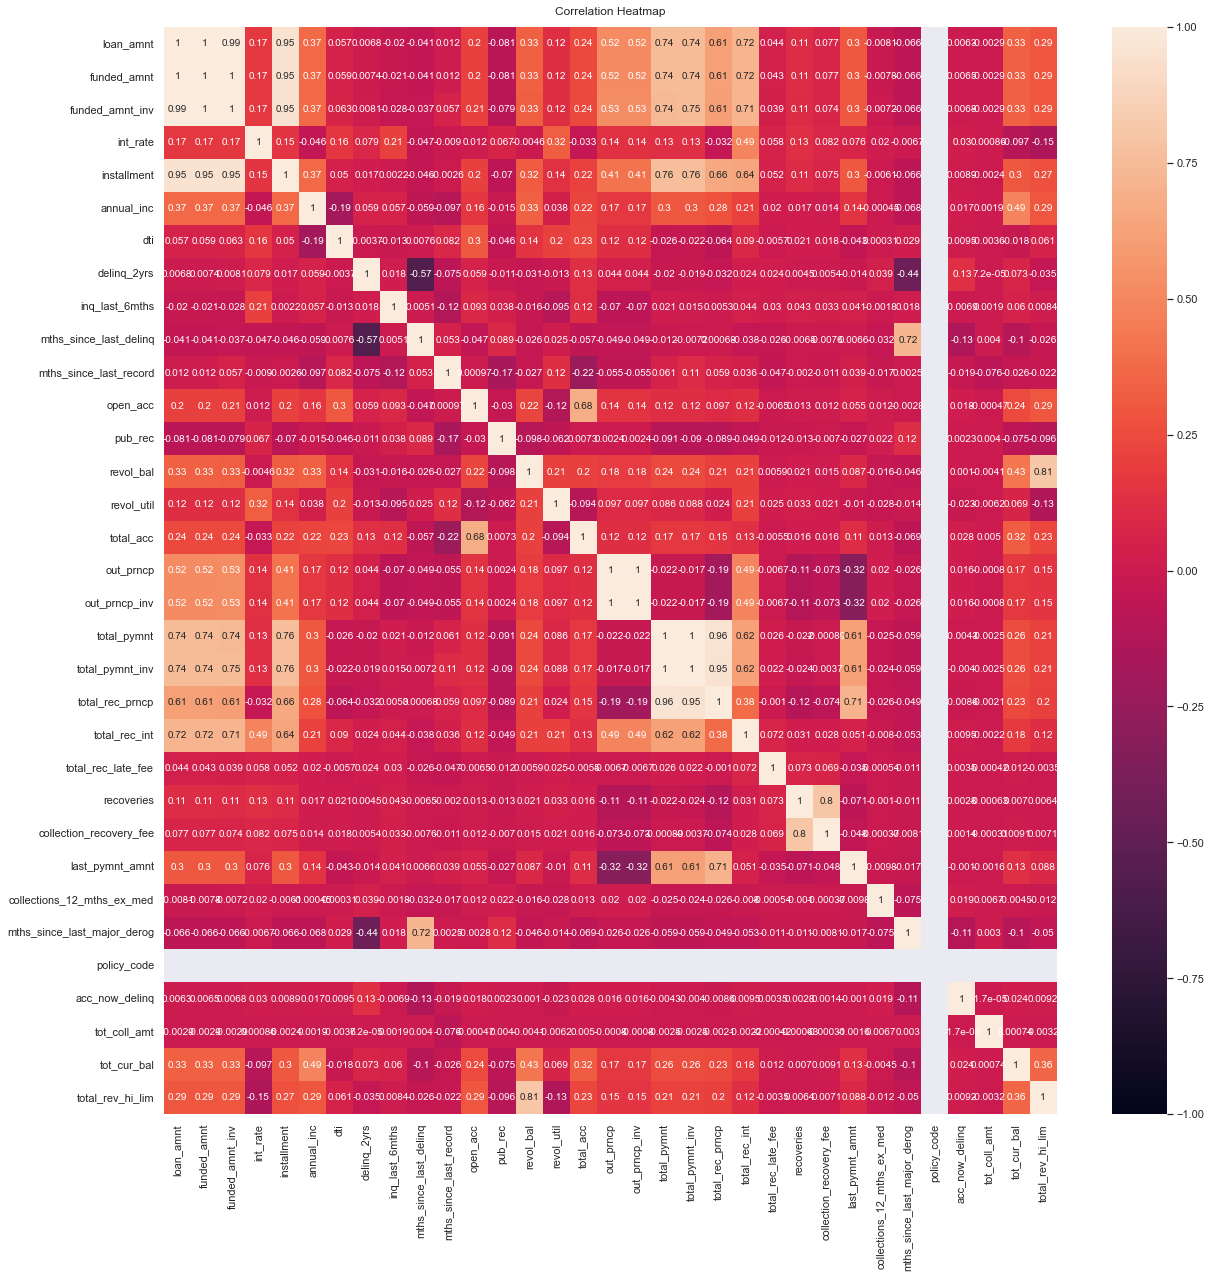

In [4]:
# Plotting the Numerical Features Correlation Heatmap 
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(df_no_identifiers.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [5]:
# Defining a function which will remove redundant numerical features 
def correlation_drop(dataframe, threshold):
    col_corr    = set()
    corr_matrix = dataframe.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [6]:
# Remove policy_code, because it has no values
df_no_policycode          = df_no_identifiers.drop(columns = ['policy_code'])

# Remove redundant numerical features with correlation more than 0.8
corr_features             = correlation_drop(df_no_policycode, 0.8)
df_no_correlated_features = df_no_policycode.drop(corr_features, axis = 1)
df_no_correlated_features.describe(include = 'all')

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal
count,466285.000000,466285,466285.000000,466285,466285,438697,445277,466285,4.662810e+05,466285,...,465909,466285.000000,239071,466243,466140.000000,98974.000000,466285,466256.000000,3.960090e+05,3.960090e+05
unique,NaN,2,NaN,7,35,205475,11,6,NaN,3,...,98,NaN,100,103,NaN,NaN,1,NaN,NaN,NaN
top,NaN,36 months,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Verified,...,Jan-16,NaN,Feb-16,Jan-16,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN
freq,NaN,337953,NaN,136929,31686,5399,150049,235875,NaN,168055,...,179620,NaN,208393,327699,NaN,NaN,466285,NaN,NaN,NaN
mean,14317.277577,NaN,13.829236,NaN,NaN,NaN,NaN,NaN,7.327738e+04,NaN,...,NaN,3123.913796,NaN,NaN,0.009085,42.852547,NaN,0.004002,1.919135e+02,1.388017e+05
std,8286.509164,NaN,4.357587,NaN,NaN,NaN,NaN,NaN,5.496357e+04,NaN,...,NaN,5554.737393,NaN,NaN,0.108648,21.662591,NaN,0.068637,1.463021e+04,1.521147e+05
min,500.000000,NaN,5.420000,NaN,NaN,NaN,NaN,NaN,1.896000e+03,NaN,...,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000e+00
25%,8000.000000,NaN,10.990000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,NaN,...,NaN,312.620000,NaN,NaN,0.000000,26.000000,NaN,0.000000,0.000000e+00,2.861800e+04
50%,12000.000000,NaN,13.660000,NaN,NaN,NaN,NaN,NaN,6.300000e+04,NaN,...,NaN,545.960000,NaN,NaN,0.000000,42.000000,NaN,0.000000,0.000000e+00,8.153900e+04
75%,20000.000000,NaN,16.490000,NaN,NaN,NaN,NaN,NaN,8.896000e+04,NaN,...,NaN,3187.510000,NaN,NaN,0.000000,59.000000,NaN,0.000000,0.000000e+00,2.089530e+05


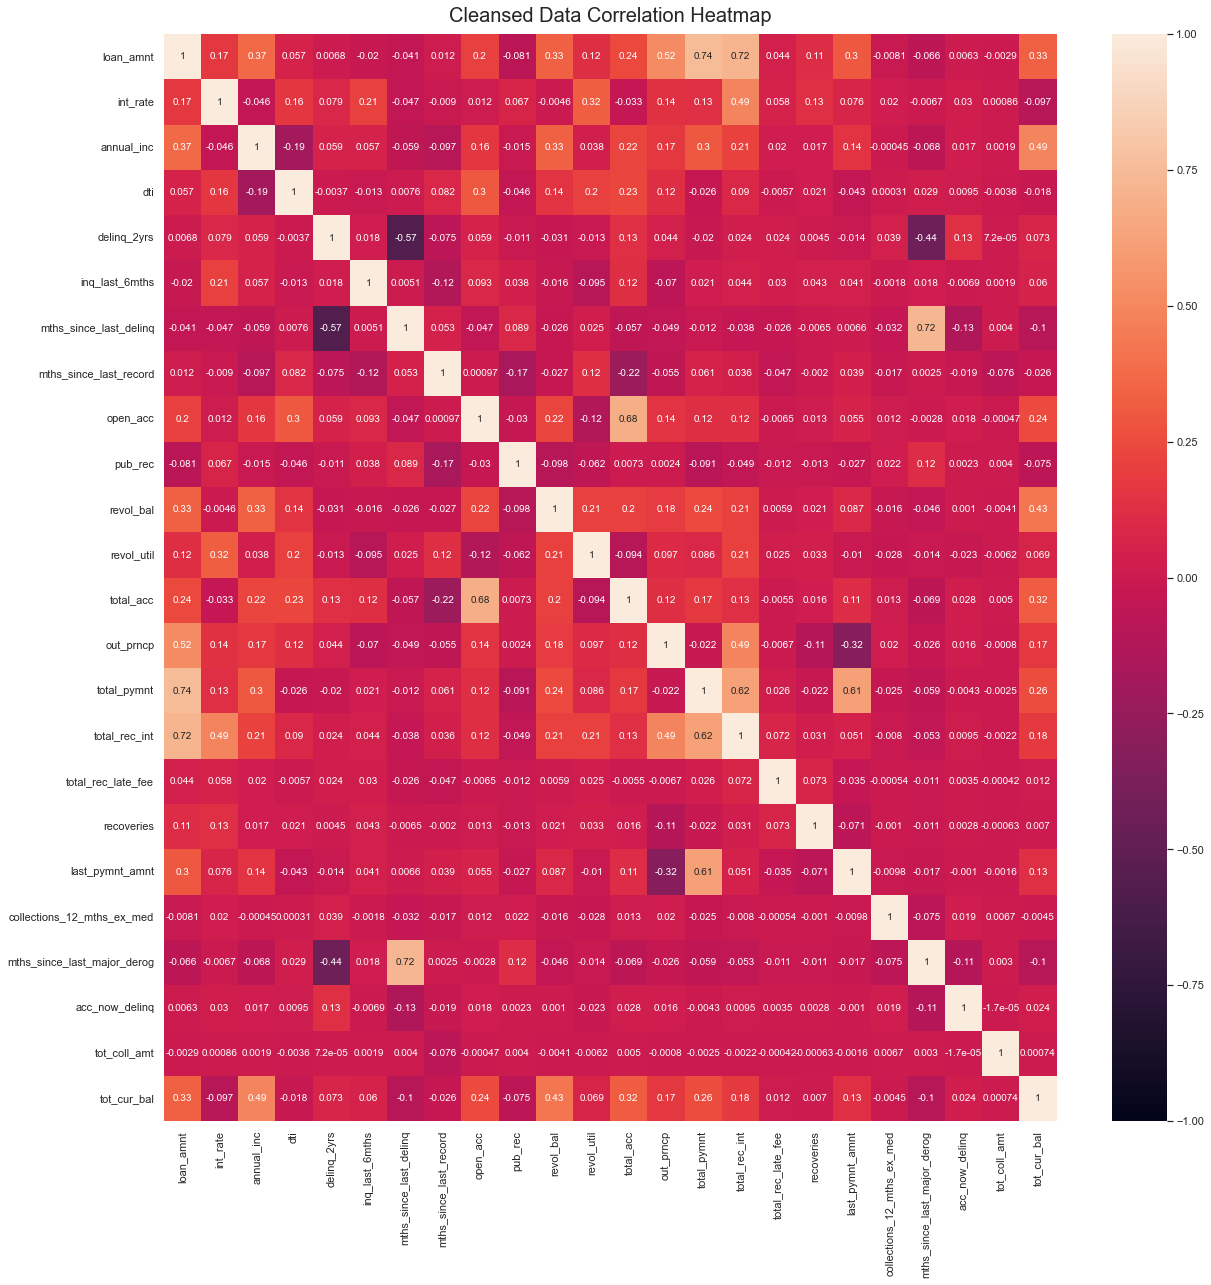

In [7]:
# Displaying Cleansed Dataset Features' Correlation Heatmap
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(df_no_correlated_features.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Cleansed Data Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

In [8]:
# Checking the properties of numerical datasets
df_no_correlated_features.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,...,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal
count,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,...,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466256.000000,3.960090e+05,3.960090e+05
mean,14317.277577,13.829236,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,...,11540.686220,2588.677225,0.650129,85.344211,3123.913796,0.009085,42.852547,0.004002,1.919135e+02,1.388017e+05
std,8286.509164,4.357587,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,...,8265.627112,2483.809661,5.265730,552.216084,5554.737393,0.108648,21.662591,0.068637,1.463021e+04,1.521147e+05
min,500.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,8000.000000,10.990000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,...,5552.125349,957.280000,0.000000,0.000000,312.620000,0.000000,26.000000,0.000000,0.000000e+00,2.861800e+04
50%,12000.000000,13.660000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,...,9419.250943,1818.880000,0.000000,0.000000,545.960000,0.000000,42.000000,0.000000,0.000000e+00,8.153900e+04
75%,20000.000000,16.490000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,...,15308.158460,3304.530000,0.000000,0.000000,3187.510000,0.000000,59.000000,0.000000,0.000000e+00,2.089530e+05
max,35000.000000,26.060000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,129.000000,84.000000,63.000000,...,57777.579870,24205.620000,358.680000,33520.270000,36234.440000,20.000000,188.000000,5.000000,9.152545e+06,8.000078e+06


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

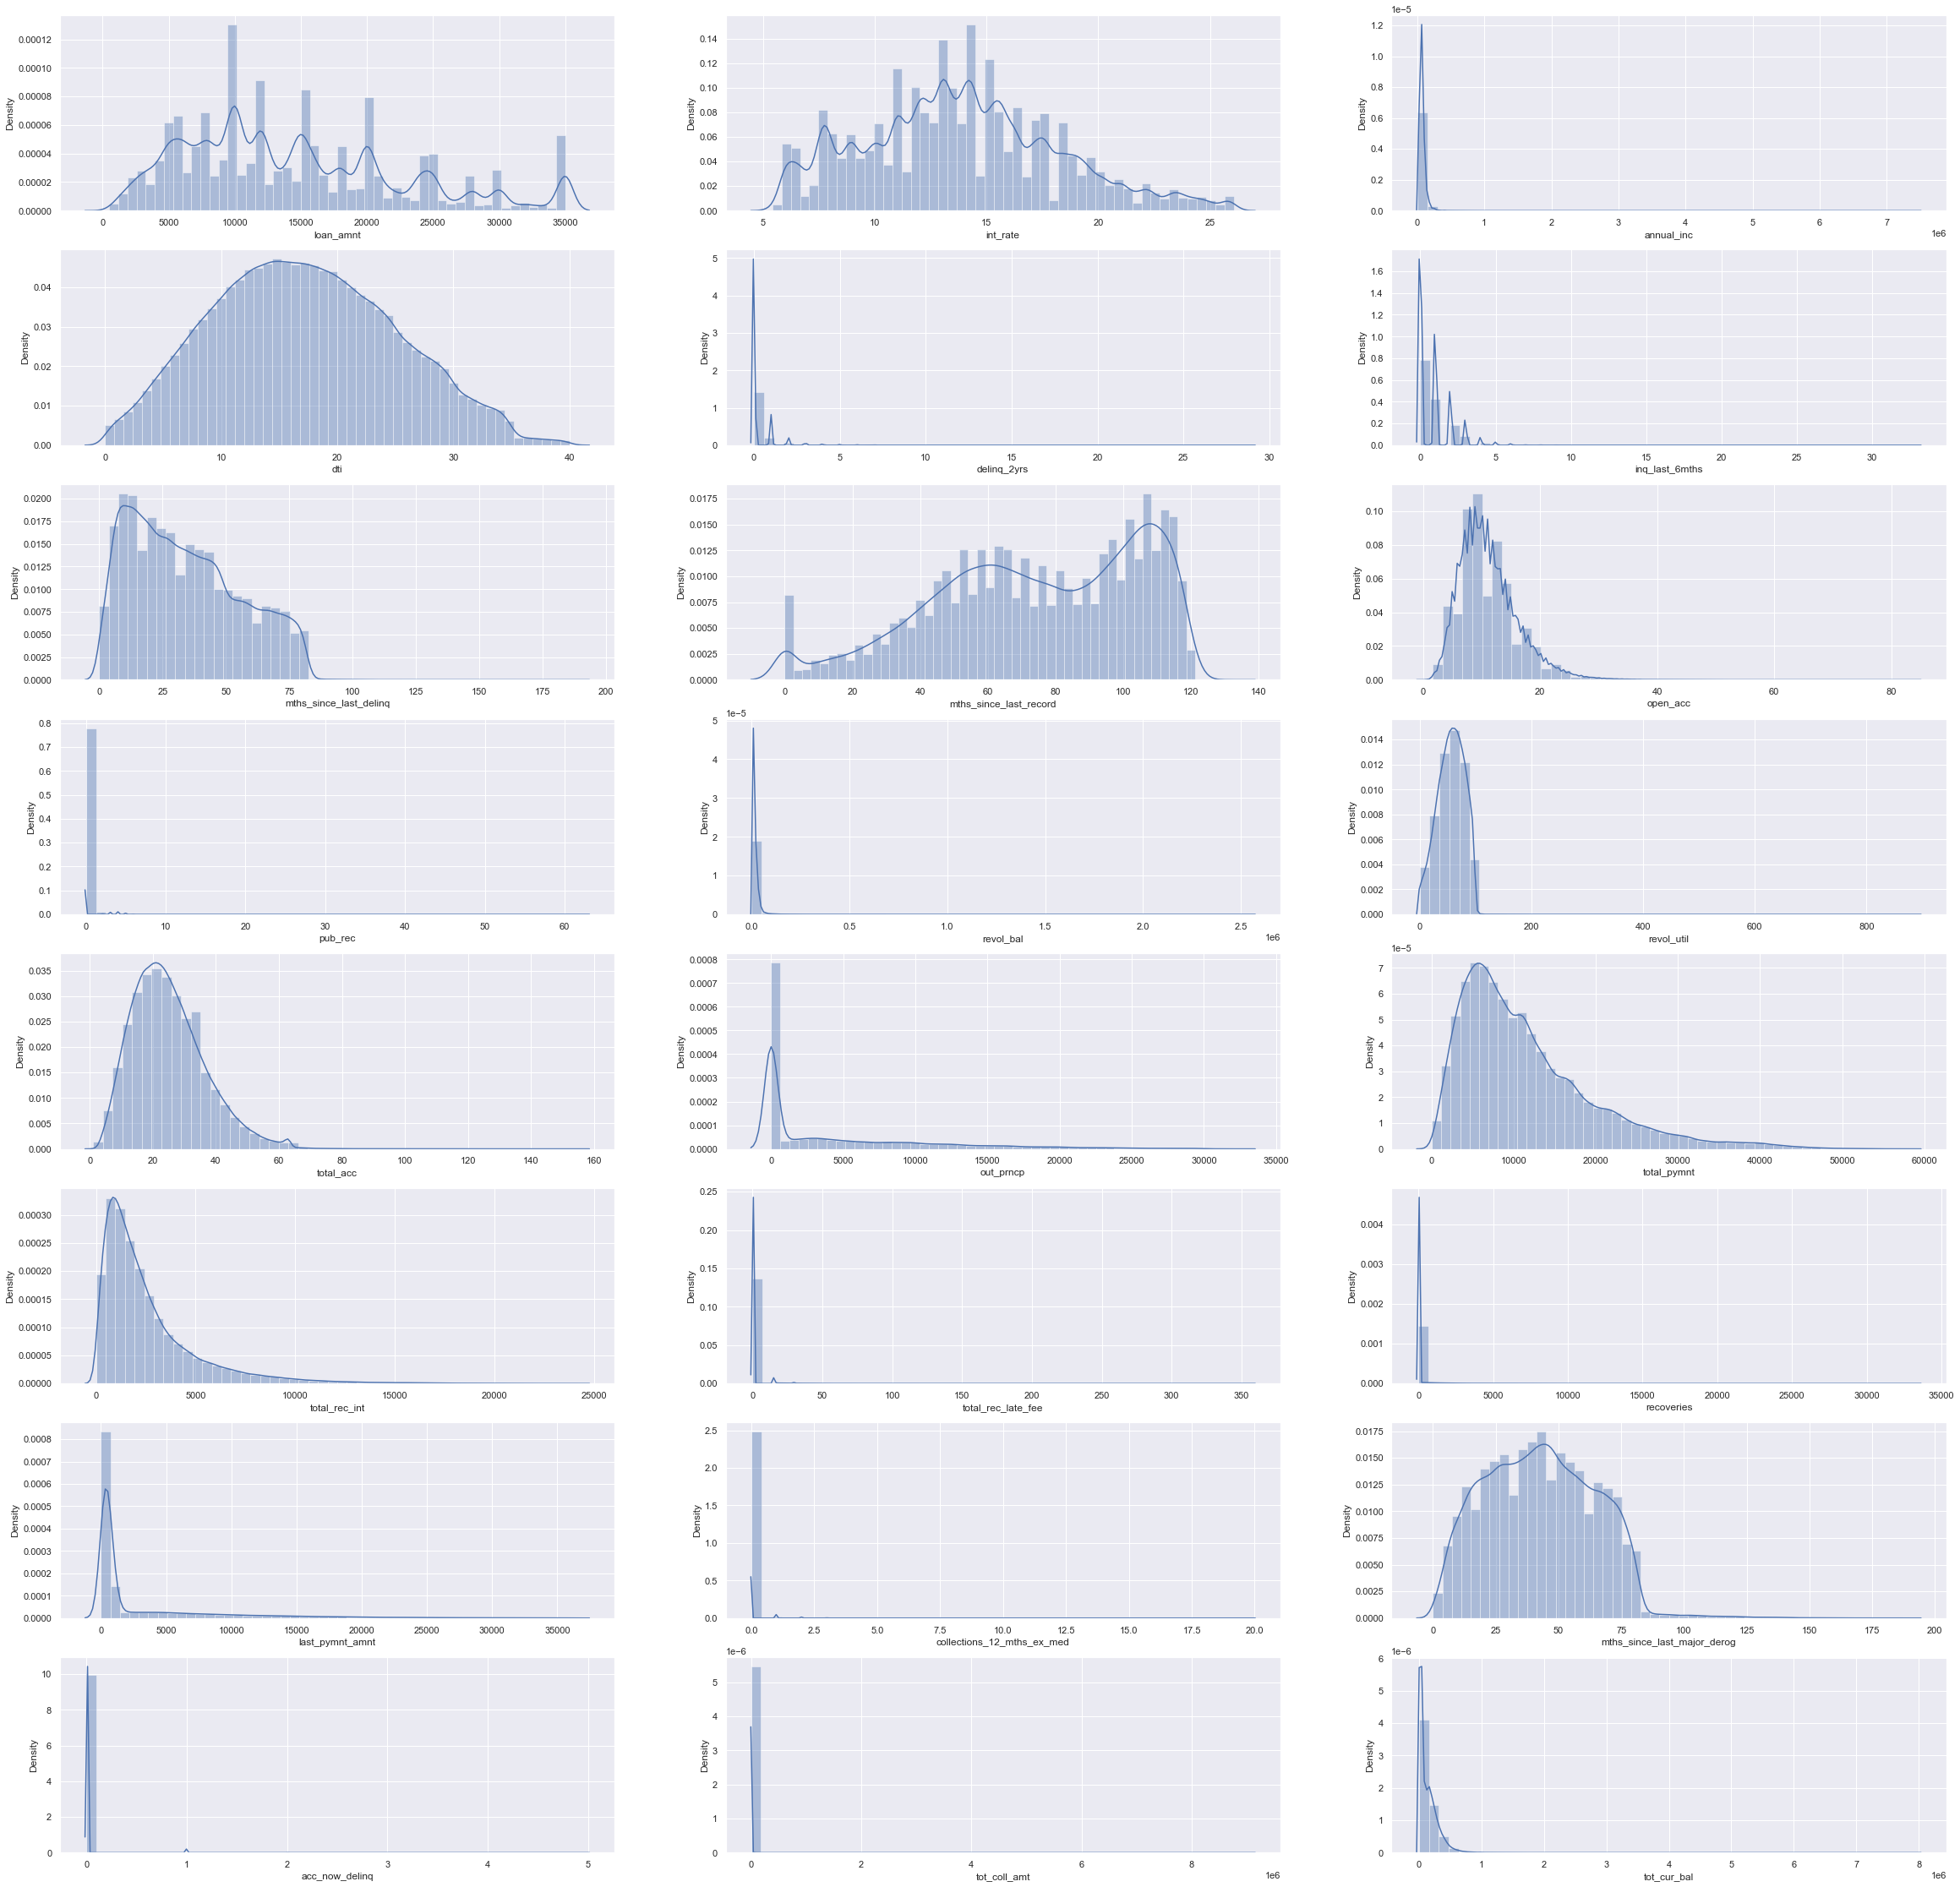

In [9]:
# Plotting the distribution graphs of the numerical features
df_numerical_data = df_no_correlated_features.select_dtypes(include=np.number)

n_cols    = 3
n_rows    = int(np.ceil(len(df_numerical_data.columns)/n_cols))
fig, axes = plt.subplots(ncols = n_cols, nrows = n_rows, figsize=(40, 40))

for i, column in enumerate(df_numerical_data.columns):
    sns.distplot(df[column],ax=axes[i//n_cols,i%n_cols])
plt.show()

In [11]:
# Dropping 'mths_since_last_delinq', 'mths_since_last_record', 'tot_coll_amt', 'tot_cur_bal', 'mths_since_last_major_derog'
# columns because it containes more than 10% null values, then dropping rows with null values.
df_no_features_with_many_nulls = df_no_correlated_features.drop(columns = ['mths_since_last_delinq', 'mths_since_last_record',
                                                                           'tot_coll_amt', 'tot_cur_bal', 
                                                                           'mths_since_last_major_derog'])
df_cleansed_numerical_data     = df_numerical_data        .drop(columns = ['mths_since_last_delinq', 'mths_since_last_record',
                                                                           'tot_coll_amt', 'tot_cur_bal',
                                                                           'mths_since_last_major_derog'])
list_of_numerical_features     = df_cleansed_numerical_data.columns.values.tolist()
df_no_numerical_missing_values = df_no_features_with_many_nulls.dropna(axis = 0, subset = list_of_numerical_features)
df_no_numerical_missing_values.describe(include = 'all')

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq
count,465832.000000,465832,465832.000000,465832,465832,438287,444836,465832,4.658320e+05,465832,...,465832.000000,465832.000000,465832.000000,465462,465832.000000,238860,465792,465832.000000,465832,465832.000000
unique,NaN,2,NaN,7,35,205264,11,6,NaN,3,...,NaN,NaN,NaN,98,NaN,100,100,NaN,1,NaN
top,NaN,36 months,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Verified,...,NaN,NaN,NaN,Jan-16,NaN,Feb-16,Jan-16,NaN,INDIVIDUAL,NaN
freq,NaN,337580,NaN,136847,31667,5397,149943,235666,NaN,167934,...,NaN,NaN,NaN,179537,NaN,208296,327523,NaN,465832,NaN
mean,14321.609346,NaN,13.828870,NaN,NaN,NaN,NaN,NaN,7.326872e+04,NaN,...,2589.525377,0.648172,85.343243,NaN,3124.885875,NaN,NaN,0.009089,NaN,0.003999
std,8284.854321,NaN,4.357579,NaN,NaN,NaN,NaN,NaN,5.493832e+04,NaN,...,2483.968243,5.258110,552.285002,NaN,5555.240506,NaN,NaN,0.108674,NaN,0.068621
min,500.000000,NaN,5.420000,NaN,NaN,NaN,NaN,NaN,1.896000e+03,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000
25%,8000.000000,NaN,10.990000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,NaN,...,957.897500,0.000000,0.000000,NaN,312.880000,NaN,NaN,0.000000,NaN,0.000000
50%,12000.000000,NaN,13.660000,NaN,NaN,NaN,NaN,NaN,6.300000e+04,NaN,...,1819.535000,0.000000,0.000000,NaN,545.990000,NaN,NaN,0.000000,NaN,0.000000
75%,20000.000000,NaN,16.490000,NaN,NaN,NaN,NaN,NaN,8.884200e+04,NaN,...,3305.330000,0.000000,0.000000,NaN,3190.885000,NaN,NaN,0.000000,NaN,0.000000


In [12]:
# Removing outliers from the numerical features
from scipy import stats
df_no_outliers = df_no_numerical_missing_values[(np.abs(stats.zscore(df_no_numerical_missing_values
                                                                     [list_of_numerical_features])) < 5).all(axis=1)]
df_no_outliers.reset_index(drop = True)
df_no_outliers.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq
count,439944.000000,439944.000000,439944.000000,439944.000000,439944.000000,439944.000000,439944.000000,439944.000000,439944.000000,439944.000000,439944.000000,439944.000000,439944.000000,439944.000000,439944.000000,439944.000000,439944.000000,439944.0,439944.0
mean,13989.889111,13.692279,70593.750000,17.234870,0.239194,0.786880,11.102802,0.139997,15224.918153,56.134030,24.821618,4365.612203,11330.516261,2495.218038,0.241388,43.735392,3060.154830,0.0,0.0
std,8016.151519,4.297810,38594.930988,7.836375,0.613219,1.048136,4.869872,0.380259,13332.842855,23.645632,11.439593,6282.525269,7972.002280,2288.093109,2.073972,262.082497,5303.927076,0.0,0.0
min,500.000000,5.420000,1896.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,8000.000000,10.740000,45000.000000,11.390000,0.000000,0.000000,8.000000,0.000000,6408.750000,39.300000,16.000000,0.000000,5515.014953,945.190000,0.000000,0.000000,310.980000,0.0,0.0
50%,12000.000000,13.530000,62000.000000,16.880000,0.000000,0.000000,10.000000,0.000000,11669.000000,57.500000,23.000000,513.040000,9325.160000,1787.490000,0.000000,0.000000,535.790000,0.0,0.0
75%,19450.000000,16.290000,86000.000000,22.790000,0.000000,1.000000,14.000000,0.000000,19982.000000,74.600000,32.000000,7261.600000,15085.540888,3216.422500,0.000000,0.000000,3293.252500,0.0,0.0
max,35000.000000,26.060000,345000.000000,39.990000,4.000000,6.000000,36.000000,2.000000,119520.000000,153.000000,83.000000,32160.380000,49999.540000,15007.310000,26.930000,2846.300000,30898.090000,0.0,0.0


In [13]:
# Checking properties of the categorical features
df_categorical_features = df_no_outliers.select_dtypes(exclude=np.number)
df_categorical_features.describe(include = 'all')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,439944,439944,439944,413988,419934,439944,439944,439944,439944,439944,...,439944,439924,439944,439944,439944,439944,439619,225883,439905,439944
unique,2,7,35,196351,11,6,3,89,9,2,...,14,60264,885,50,660,2,98,98,100,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,...,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,322711,131808,30571,5087,140297,220444,155437,36330,213103,439936,...,258568,154133,4989,67660,3490,285906,170448,197534,310888,439944


In [14]:
# Removing inappropriate categorical features
df_categorical_cleansed = df_no_outliers.drop(columns = [
                          'grade', 'sub_grade',     # This variable does not contribute to the machine learning model
                          'emp_title',              # There are 196351 unique values 
                          'url', 'desc', 'title',   # These columns only contain description and too many unique values
                          'zip_code', 'addr_state', # Unneccessary categorical features
                          'issue_d',                # Has too many unique features
                          'application_type',       # Has only one unique feature
                          'earliest_cr_line',       # Has 660 different features
                          'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d' # Has too many unique features
                          ])
df_categorical_features2 = df_categorical_cleansed.select_dtypes(exclude=np.number)
df_categorical_features2.describe(include = 'all')

,term,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,initial_list_status
count,439944,419934,439944,439944,439944,439944,439944,439944
unique,2,11,6,3,9,2,14,2
top,36 months,10+ years,MORTGAGE,Verified,Current,n,debt_consolidation,f
freq,322711,140297,220444,155437,213103,439936,258568,285906


In [15]:
# Listing the unique values of the loan_status column
df_categorical_cleansed['loan_status'].unique() 

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [16]:
# Mapping the loan status column values to 0 for non-risky credits and 1 for risky credits
df_categorical_cleansed['loan_status'] = df_categorical_cleansed['loan_status'].map({
                                         'Fully Paid'                                          : 0, 
                                         'Current'                                             : 0, 
                                         'In Grace Period'                                     : 1, 
                                         'Charged Off'                                         : 1, 
                                         'Default'                                             : 1, 
                                         'Late (31-120 days)'                                  : 1, 
                                         'Late (16-30 days)'                                   : 1, 
                                         'Does not meet the credit policy. Status:Fully Paid'  : 0,
                                         'Does not meet the credit policy. Status:Charged Off' : 1})
df_categorical_cleansed.describe(include = 'all')

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,...,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq
count,439944.000000,439944,439944.000000,419934,439944,439944.000000,439944,439944.000000,439944,439944,...,439944.000000,439944,439944.000000,439944.000000,439944.000000,439944.000000,439944.000000,439944.000000,439944.0,439944.0
unique,NaN,2,NaN,11,6,NaN,3,NaN,2,14,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,36 months,NaN,10+ years,MORTGAGE,NaN,Verified,NaN,n,debt_consolidation,...,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,322711,NaN,140297,220444,NaN,155437,NaN,439936,258568,...,NaN,285906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,13989.889111,NaN,13.692279,NaN,NaN,70593.750000,NaN,0.107825,NaN,NaN,...,24.821618,NaN,4365.612203,11330.516261,2495.218038,0.241388,43.735392,3060.154830,0.0,0.0
std,8016.151519,NaN,4.297810,NaN,NaN,38594.930988,NaN,0.310160,NaN,NaN,...,11.439593,NaN,6282.525269,7972.002280,2288.093109,2.073972,262.082497,5303.927076,0.0,0.0
min,500.000000,NaN,5.420000,NaN,NaN,1896.000000,NaN,0.000000,NaN,NaN,...,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,8000.000000,NaN,10.740000,NaN,NaN,45000.000000,NaN,0.000000,NaN,NaN,...,16.000000,NaN,0.000000,5515.014953,945.190000,0.000000,0.000000,310.980000,0.0,0.0
50%,12000.000000,NaN,13.530000,NaN,NaN,62000.000000,NaN,0.000000,NaN,NaN,...,23.000000,NaN,513.040000,9325.160000,1787.490000,0.000000,0.000000,535.790000,0.0,0.0
75%,19450.000000,NaN,16.290000,NaN,NaN,86000.000000,NaN,0.000000,NaN,NaN,...,32.000000,NaN,7261.600000,15085.540888,3216.422500,0.000000,0.000000,3293.252500,0.0,0.0


In [17]:
# Getting dummies for the categorical features
df_with_dummies = pd.get_dummies(df_categorical_cleansed, drop_first = True)
df_with_dummies.reset_index()

,index,loan_amnt,int_rate,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,0,5000,10.65,24000.0,0,27.65,0.0,1.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2500,15.27,30000.0,1,1.00,0.0,5.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,2400,15.96,12252.0,0,8.72,0.0,2.0,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,3,10000,13.49,49200.0,0,20.00,0.0,1.0,10.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,4,3000,12.69,80000.0,0,17.94,0.0,0.0,15.0,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439939,466280,18400,14.47,110000.0,0,19.85,0.0,2.0,18.0,0.0,...,0,0,0,0,0,0,0,0,0,1
439940,466281,22000,19.97,78000.0,1,18.45,0.0,5.0,18.0,1.0,...,0,0,0,0,0,0,0,0,0,0
439941,466282,20700,16.99,46000.0,0,25.65,0.0,2.0,18.0,0.0,...,0,0,0,0,0,0,0,0,0,0
439942,466283,2000,7.90,83000.0,0,5.39,3.0,1.0,21.0,0.0,...,0,0,0,0,0,0,0,0,0,1


### Separating target and input 
#### Performing test-train split and numerical feature scaling

In [18]:
# Selecting the inputs and target for the machine learning modelling
inputs = df_with_dummies.drop(columns = ['loan_status']) 
target = df_with_dummies['loan_status']

In [19]:
# Splitting the dataset into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 0)

In [20]:
# Scaling the numerical features with standard scaler from sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[list_of_numerical_features] = sc.fit_transform(x_train[list_of_numerical_features])
x_test [list_of_numerical_features] = sc.transform    (x_test [list_of_numerical_features])

### Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

random_forest_results_list = []

# Performing hyperparameter tuning for the number of trees
for i in range(20, 200, 20):
    random_forest_classifier  = RandomForestClassifier(n_estimators = i, criterion = 'entropy',  random_state = 0) 
    random_forest_classifier.fit(x_train, y_train)
    random_forest_y_pred      = random_forest_classifier.predict(x_test)
    random_forest_accuracy    = accuracy_score(y_test, random_forest_y_pred)
    random_forest_f1          = f1_score(y_test, random_forest_y_pred)
    random_forest_precision   = precision_score(y_test, random_forest_y_pred)
    random_forest_recall      = recall_score(y_test, random_forest_y_pred)
    random_forest_results_list.append([i, random_forest_accuracy, random_forest_precision, random_forest_recall, 
                                       random_forest_f1])
    
random_forest_results = pd.DataFrame(random_forest_results_list, columns = ['Tree Count', 'Accuracy', 'Precision', 'Recall', 
                                                                            'F1 score'])
random_forest_results 

,Tree Count,Accuracy,Precision,Recall,F1 score
0,20,0.972122,0.995835,0.740943,0.849684
1,40,0.972428,0.996988,0.742973,0.851439
2,60,0.972667,0.997140,0.745111,0.852896
3,80,0.972792,0.997286,0.746179,0.853650
4,100,0.972917,0.997290,0.747355,0.854420
5,120,0.972951,0.997575,0.747462,0.854594
6,140,0.972894,0.997006,0.747355,0.854316
7,160,0.972928,0.997575,0.747248,0.854454
8,180,0.972940,0.997575,0.747355,0.854524


In [26]:
random_forest_classifier  = RandomForestClassifier(n_estimators = 200, criterion = 'entropy',  random_state = 0) 
random_forest_classifier.fit(x_train, y_train)
random_forest_y_pred      = random_forest_classifier.predict(x_test)
random_forest_accuracy    = accuracy_score(y_test, random_forest_y_pred)
random_forest_f1          = f1_score(y_test, random_forest_y_pred)
random_forest_precision   = precision_score(y_test, random_forest_y_pred)
random_forest_recall      = recall_score(y_test, random_forest_y_pred)
random_forest_results_list.append([200, random_forest_accuracy, random_forest_precision, random_forest_recall, 
                                       random_forest_f1])
    
random_forest_results = pd.DataFrame(random_forest_results_list, columns = ['Tree Count', 'Accuracy', 'Precision', 'Recall', 
                                                                            'F1 score'])
random_forest_results 

,Tree Count,Accuracy,Precision,Recall,F1 score
0,20,0.972122,0.995835,0.740943,0.849684
1,40,0.972428,0.996988,0.742973,0.851439
2,60,0.972667,0.997140,0.745111,0.852896
3,80,0.972792,0.997286,0.746179,0.853650
4,100,0.972917,0.997290,0.747355,0.854420
5,120,0.972951,0.997575,0.747462,0.854594
6,140,0.972894,0.997006,0.747355,0.854316
7,160,0.972928,0.997575,0.747248,0.854454
8,180,0.972940,0.997575,0.747355,0.854524
9,200,0.972883,0.997431,0.746927,0.854192


### Naive Bayes Classifier

In [37]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(x_train, y_train)
naive_bayes_y_pred     = naive_bayes_classifier.predict(x_test)
naive_bayes_cm         = confusion_matrix(y_test, naive_bayes_y_pred)
naive_bayes_accuracy   = accuracy_score(y_test, naive_bayes_y_pred)
naive_bayes_f1         = f1_score(y_test, naive_bayes_y_pred)
naive_bayes_precision  = precision_score(y_test, naive_bayes_y_pred)
naive_bayes_recall     = recall_score(y_test, naive_bayes_y_pred)
print(naive_bayes_cm)
accuracy_score(y_test, naive_bayes_y_pred)

[[76427  2205]
 [ 5103  4254]]


0.9169441634749799

### K-Nearest Neighbors Classifier
#### The number of neighbors was selected by calculating the square root of the training dataset sample count

In [38]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier          = KNeighborsClassifier(n_neighbors = int(np.floor(len(y_train.index)**0.5)), metric = 'minkowski', p = 2)
KNNclassifier.fit(x_train, y_train)
KNN_y_pred             = KNNclassifier.predict(x_test)
KNN_cm                 = confusion_matrix(y_test, KNN_y_pred)
KNN_accuracy           = accuracy_score(y_test, KNN_y_pred)
KNN_f1                 = f1_score(y_test, KNN_y_pred)
KNN_precision          = precision_score(y_test, KNN_y_pred)
KNN_recall             = recall_score(y_test, KNN_y_pred)
print(KNN_cm)
accuracy_score(y_test, KNN_y_pred)

[[78631     1]
 [ 6631  2726]]


0.9246269420041141

### Logistic Regression Classifier

In [39]:
from sklearn.linear_model import LogisticRegression
logistic_classifier    = LogisticRegression(random_state = 0)
logistic_classifier.fit(x_train, y_train)
logistic_y_pred        = logistic_classifier.predict(x_test)
logistic_cm            = confusion_matrix(y_test, logistic_y_pred)
logistic_accuracy      = accuracy_score(y_test, logistic_y_pred)
logistic_f1            = f1_score(y_test, logistic_y_pred)
logistic_precision     = precision_score(y_test, logistic_y_pred)
logistic_recall        = recall_score(y_test, logistic_y_pred)
print(logistic_cm)
accuracy_score(y_test, logistic_y_pred)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[78512   120]
 [ 2395  6962]]


0.9714168816556615

### Results Summary

In [97]:
r_forest                 = random_forest_results[random_forest_results['Tree Count'] == 180].values.tolist()
r_forest[0][0]           = 'Random Forest, 180 Trees'

machine_learning_results_list = []
machine_learning_results_list.append([r_forest[0], 
                            ['Naive Bayes', naive_bayes_accuracy, naive_bayes_precision, naive_bayes_recall, naive_bayes_f1],
                            ['KNN, 593 Neighbors', KNN_accuracy, KNN_precision, KNN_recall, KNN_f1],
                            ['Logistic Regression', logistic_accuracy, logistic_precision, logistic_recall, logistic_f1]])

machine_learning_results = pd.DataFrame(machine_learning_results_list[0], 
                                        columns = ['Method', 'Accuracy', 'Precision', 'Recall', 'F1 score'])
machine_learning_results 

,Method,Accuracy,Precision,Recall,F1 score
0,"Random Forest, 180 Trees",0.972940,0.997575,0.747355,0.854524
1,Naive Bayes,0.916944,0.658616,0.454633,0.537936
2,"KNN, 593 Neighbors",0.924627,0.999633,0.291333,0.451175
3,Logistic Regression,0.971417,0.983056,0.744042,0.847010


### Therefore, the best classification algorithm is the Random Forest Classification with 180 Trees, whose accuracy and precision reached more than 97% and 99% respectively.